# Union Find (Disjoint Sets)

Union-find is used for tracking which nodes are connected in a graph, and which are separate. It can also be used for cycle detection.

> We can do this using DFS/hashset, but this is only efficient for static graphs. If we add edges overtime, this is a dynamic graph where union-find is more efficient.

## Disjoint Sets

Disjoint sets are sets which don't have elements in common. Union-Find creates a disjoint set *tree* data structure, from a graph of nodes and edges.

- Merging disjoint sets to a single disjoint set using Union operation.
- Finding representative (parent) of a disjoint set using Find operation.

## Concept

Suppose we're given an array of edges representing a graph `edges: [1,2], [4,1], [2,4]`. Each edge is undirected.

Our task is to determine if a cycle exists, and we use union-find.

Initially, each node stands by itself and are all disconnected. Since we have not connected them yet, each node is a parent to itself, i.e. points to itself.

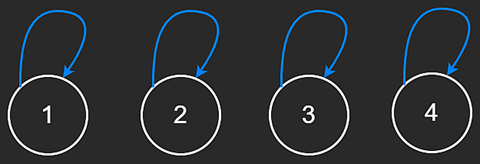

Next, we go through the edges to connected the nodes.

We start with the first edge `[1,2]`:
- Since `2` is connected to `1`, we can select it to be the child of `1` - this is `union`
  - it doesnt matter for now which is the parent or child as long as they're connected
- Note that if 2 nodes are already part of the same disjoint set, we do not want to connect them together

- Given a node which is part of a disjoint set, the `find` operation gets the parent node of this disjoint set
  - We use `find` to ensure 2 nodes from one disjoint set aren't incorrectly connected

## Implementation

### Initialization

```python
class UnionFind:
    def __init__(self, n):
        #this stores a dict of 'node':parent_node
        self.par = {}
        #this stores a dict of 'node':'height in the tree'
        #the rank stores the longest height of the tree
        self.rank = {}

        for i in range(1, n + 1):
            #one node can only have one parent
            #a parent can have multiple (more than 2) children
            self.par[i] = i
            self.rank[i] = 0
```

### Find

- `find` will take in a node `n` and return its node parent.
- We traverse up the tree until we find the root. The root's parent is itself.
- If 2 nodes have the same root, they are part of the same disjoint set and is connected in some way.
- If they have different roots, there is no connection between them

```python
  # Find parent of n, with path compression.
  def find(self, n):
      p = self.par[n]
      while p != self.par[p]:
          #path compression
          self.par[p] = self.par[self.par[p]]
          p = self.par[p]
      return p
```

**Path Compression**

If we do `union` on a large number of vertices, this can create a long chain like a linked list. This is bad for traversal, compared to well balanced trees.

To alleviate this problem, when we go up the tree, we can set the grandparent as the new parent. This splits up the tree and make it less like a chain.

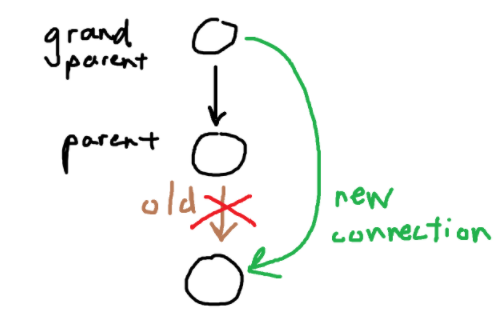

### Union

The union function takes two nodes and determines if a union can be performed between these corresponding disjoint sets. We also take into account the height of both trees to make the final tree as balanced as possible - this is known as *union by rank*

1. If 2 vertices have same parent, union cannot be performed
2. If node `n1` has root `p1` and `n2` has root `p2`, and `p1`'s tree is a higher height than `p2`'s tree, then `p1` will the parent of `p2`
3. If `p2`'s tree has a higher height, assign `p2` to be the parent of `p1`
4. If both trees have the same height, we can set `p2` to be the parent of `p1`, but this time the height of `p2` will have to increase by 1

```python
def union(self, n1, n2):
    p1, p2 = self.find(n1), self.find(n2)
    if p1 == p2:
        return False

    if self.rank[p1] > self.rank[p2]:
        self.par[p2] = p1
    elif self.rank[p1] < self.rank[p2]:
        self.par[p1] = p2
    else:
        self.par[p1] = p2
        self.rank[p2] += 1
    return True
```

### Demo of Cycle Detection

The visual below demonstrates using union on `edges = [1,2], [4,1], [2,4]`
- We connect `1` as the parent of `2`, then `1` to be the parent of `4` as the parent `1` has a higher rank
- Then when we do `[2,4]`, we see that they both belong to the same disjoint set. Hence there is another way to connect them and a cycle is present.

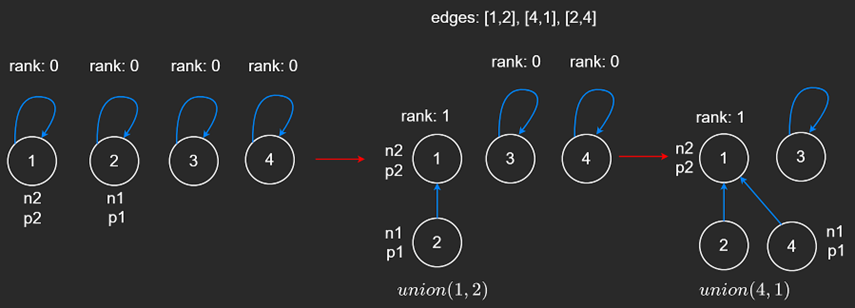

## Complexity

In worst case, `find` will result in $O(n)$ where $n$ is size of this disjoint set, as this will be a chain like linked list. Need to traverse every node.

By implementing union by rank and path compression, we get a time complexity of $O(\alpha(n))$, where $\alpha$ is the Inverse Ackermann function. This is basically $O(1)$.

So if $m$ is the number of edges/connections we have, then the time-complexity of union-find is $O(m)$.

---

## Problem: Accounts Merge

Given a list of accounts where each element `accounts[i]` is a list of strings, where the first element `accounts[i][0]` is a name,
and the rest of the elements are emails representing emails of the account.

Now, we would like to merge these accounts. 
- Two accounts definitely belong to the same person if there is some common email to both accounts.
- Note that even if two accounts have the same name, they may belong to different people as people could have the same name.
- A person can have any number of accounts initially, but all of their accounts definitely have the same name.

After merging the accounts, return the accounts in the following format: the first element of each account is the name, and the rest of the elements are emails in **sorted order**.
The accounts themselves can be returned in **any order**.

In [ ]:
import collections
#simple union-find without path compression and union by ranking
class UF:
    def __init__(self, N):
        #from 0 till N-1
        #index is the child, value is the parent node
        self.par = list(range(N))
    def union(self, n1, n2):
        #always set parent of n1 to be n2
        self.par[self.find(n1)] = self.find(n2)
    def find(self, x):
        while x != self.par[x]:
            # path compression
            #self.par[x] = self.par[self.par[x]]
            x = self.par[x]
        return x

class Solution:
    # 196 ms, 82.09%. 
    def accountsMerge(self, accounts):
        uf = UF(len(accounts))
        
        # Creat unions between indexes
        #keys refer to the emails, while values are the owners
        ownership = {}
        for i, (_, *emails) in enumerate(accounts):
            for email in emails:
                #someone already has this email
                if email in ownership:
                    #union these 2 people
                    uf.union(i, ownership[email])
                #update the new person i
                #one email can only have one owner in the ownership dict
                #the diff indexes of owners will be linked in a disjoint set
                ownership[email] = i
        
        # Append emails to correct index

        #defaultdict will create a value [] when key doesnt exist
        ans = collections.defaultdict(list)
        for email, owner in ownership.items():
            #the parent is the same person as everyone else in the disjoint set
            ans[uf.find(owner)].append(email)
        
        return [[accounts[i][0]] + sorted(emails) for i, emails in ans.items()]